In [86]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.naive_bayes as nb
import pandas as pd

data = pd.read_csv('dataset_pca.csv')

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Target
0,-0.314242,-0.205719,-0.028824,0.206659,0.012864,-0.874508,0.387179,0.010646,Dropout
1,-0.470709,-0.329179,0.884960,-0.093840,-0.083021,0.226558,0.106516,-0.184132,Graduate
2,-0.396169,0.580298,0.717272,0.092688,0.067955,-0.065536,-0.096558,-0.204557,Dropout
3,-0.130125,0.273844,-0.174658,-0.023552,-0.576278,0.067090,-0.072535,-0.123530,Graduate
4,-0.131716,0.229628,-0.067836,-0.505245,-0.335535,-0.094679,0.105542,0.325822,Graduate
...,...,...,...,...,...,...,...,...,...
4419,-0.276222,-0.514504,-0.105317,-0.246347,0.491042,0.030594,-0.111448,-0.049411,Graduate
4420,-0.528528,-0.238030,0.820748,0.271141,0.030093,0.218110,-0.039184,-0.136250,Dropout
4421,0.814815,0.084677,0.172297,-0.317228,-0.250588,-0.060601,-0.045802,0.100848,Dropout
4422,0.810934,0.170534,0.080124,0.148968,-0.501787,-0.070562,0.011215,-0.056446,Graduate


<AxesSubplot:xlabel='Target', ylabel='Count'>

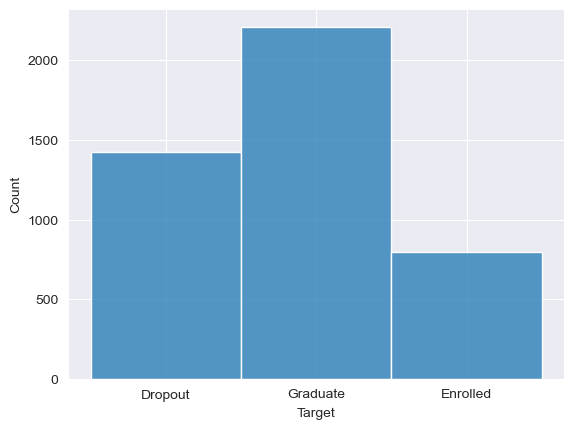

In [87]:
import seaborn as sns
#Plotting histogram of target
sns.histplot(data['Target'])

From the histogram, there presents an unbalanced distribution of the target classes. 
Synthetic Minority Oversampling Technique (SMOTE) is used to equalise the counts per classes.

<AxesSubplot:xlabel='Target', ylabel='Count'>

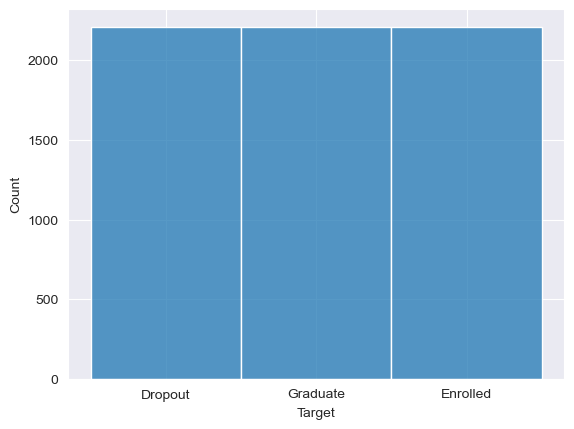

In [93]:
from imblearn.over_sampling import SMOTE

# SMOTE to account for unbalanced data
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

#Plotting histogram of target
sns.histplot(Y)

In [91]:
from sklearn.model_selection import train_test_split

# Splitting dataset to training, testing, validation
#20% for testing - 10% for validation - 70% for training
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.12, random_state=42)
print("Total number of datapoints: "+str(X.shape[0]))
print("Number of datapoints in the training set: "+str(X_train.shape[0]))
print("Number of datapoints in the validation set: "+str(X_val.shape[0]))
print("Number of datapoints in the test set: "+str(X_test.shape[0]))

Total number of datapoints: 6627
Number of datapoints in the training set: 4664
Number of datapoints in the validation set: 637
Number of datapoints in the test set: 1326


Cross-Validation Step

Categorical NB classification

Maximum Value of accuracy: 0.3218210361067504
Alpha parameter corresponding to the max value: 2.4024024024024024


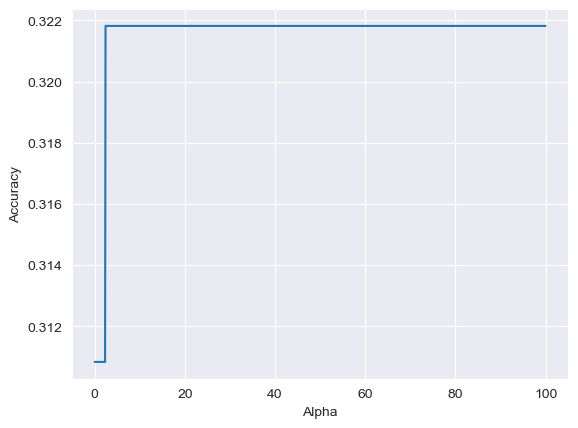

In [92]:
from sklearn.metrics import accuracy_score

# to be able to use catergoical NB classifier, the variables need to be positive discrete
# this is done by using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
# Initialize OrdinalEncoder
encoder = OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.fit_transform(X_val)
X_test_enc = encoder.fit_transform(X_test)

# Size of the array to contain values of the hyperparameter
N = 1000

# Hyperparameter: alpha, taking 1000 values between 0 and 100
alpha = np.linspace(0,100,N)
# array to store accuracies associated to each alpha
accuracies = np.zeros(len(alpha))

# Looping iterations to evaluate performance via accuracy for each alpha
for i in range(len(alpha)):
    # Define the model
    nb_model = nb.CategoricalNB(alpha = alpha[i])
    nb_model.fit(X_train_enc, y_train)
    y_pred = nb_model.predict(X_val_enc)
    accuracies[i] = accuracy_score(y_val, y_pred)

# visualise the relationship of the hyperparameter and accuracy
plt.plot(alpha, accuracies)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

# Finding maximum value and its index, and its corresponded alpha (the first value of the maximum is taken)
max_value = np.max(accuracies)  # Maximum value
max_index = np.argmax(accuracies)  # Index of the maximum value
optimum_alpha_categorical = alpha[max_index] # chosen optimum alpha value after tuning the hyperparameter  
print(f"Maximum Value of accuracy: {max_value}")
print(f"Alpha parameter corresponding to the max value: {optimum_alpha_categorical}")       

Gaussian NB classification

Maximum Value of accuracy: 0.5243328100470958
var_smoothing parameter corresponding to the max value: 0.0


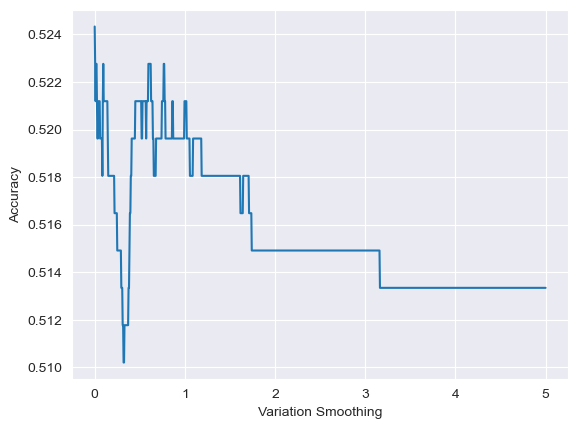

In [101]:
# Gaussian Naive Bayes. 
# tuning hyperparameter var_smoothing 
var_smooth = np.linspace(0,5,N)
accuracies = np.zeros(len(var_smooth))
for i in range(len(var_smooth)):
    # Define the model with a specific var_smoothing
    nb_model = nb.GaussianNB(var_smoothing = var_smooth[i])
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_val)
    accuracies[i] = accuracy_score(y_val, y_pred)
    
plt.plot(var_smooth, accuracies)
plt.xlabel('Variation Smoothing')
plt.ylabel('Accuracy')

# Finding maximum value and its index
max_value = np.max(accuracies)  # Maximum value
max_index = np.argmax(accuracies)  # Index of the maximum value
optimum_var_smooth = var_smooth[max_index]
print(f"Maximum Value of accuracy: {max_value}")
print(f"var_smoothing parameter corresponding to the max value: {optimum_var_smooth}")

The hyperparameter var_smoothing is an user-defined value to the variance of the distribution that widens the normal distribution curve and accounts for more samples that are further away from the distribution mean.

Bernoulli NB Classification

Maximum Value of accuracy: 0.5675403929423223
Binarise Threshold corresponding to the max value of accuracy: -0.01501501501501501
Maximum Value of accuracy: 0.5698587127158555
alpha parameter corresponding to the max value: 212.21221221221222


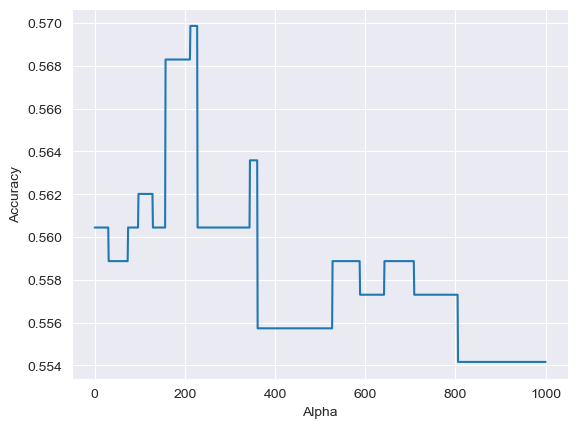

In [97]:
# Bernoulli NB
# Binarize data (using a threshold of 1.0)
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import cross_val_score

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Binarisation operation, to assign 0 to values below a certain threshold and 1 for those above
thresholds = np.linspace(-5, 5, N)
acc = np.zeros(N)
# Performing cross validation for the threshold for binarisation
for t in range(len(thresholds)):
    binarizer = Binarizer(threshold=thresholds[t])
    X_binarized = binarizer.transform(X_train)
    model = nb.BernoulliNB()
    scores = cross_val_score(model, X_binarized, y_train,scoring = 'accuracy', cv=3)
    acc[t] = scores.mean()
    # print(f"Threshold: {t}, Accuracy: {scores.mean()}")

# Finding maximum value and its index of the binarize threshold
max_value = np.max(acc)  # Maximum value
max_index = np.argmax(acc)  # Index of the maximum value
optimum_threshold = thresholds[max_index]
print(f"Maximum Value of accuracy: {max_value}")
print(f"Binarise Threshold corresponding to the max value of accuracy: {optimum_threshold}")


# Performing binarisation on the train data using the optimum threshold
# Binarize data (using a threshold of 1.0)
binarizer = Binarizer(threshold=optimum_threshold)
X_binarized_train = binarizer.transform(X_train)

# Bernoulli model
# the range of alpha are chosen via trial and error
alpha = np.linspace(0,1000,N)
accuracies = np.zeros(len(alpha))
for i in range(len(alpha)):
    # Define the model
    nb_model = nb.BernoulliNB(alpha = alpha[i])
    nb_model.fit(X_binarized_train, y_train)
    X_binarized_val = binarizer.transform(X_val)
    y_pred = nb_model.predict(X_binarized_val)
    accuracies[i] = accuracy_score(y_val, y_pred)
    
plt.plot(alpha, accuracies)    
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

# Finding maximum value and its index
max_value = np.max(accuracies)  # Maximum value
max_index = np.argmax(accuracies)  # Index of the maximum value
optimum_alpha_bernoulli = alpha[max_index]
print(f"Maximum Value of accuracy: {max_value}")
print(f"alpha parameter corresponding to the max value: {optimum_alpha_bernoulli}")

A relatively high value of alpha of 212 appeared to result in highest accuracy, which might have indicated the needing to help the model generalize better by assuming a small amount of "presence" for each feature in every class, even if it might not have been observed in the training data.


Implementation: determining the NB classifier at the optimum parameters of the best performance via accuracy

In [109]:
# Implementation
# accuracy on test dataset
# Categorical NB
model = nb.CategoricalNB(alpha = optimum_alpha_categorical)
model.fit(X_train_enc, y_train)
y_pred = model.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print(f"The performance of the CategoricalNB is: {acc}")

# Gaussian NB
model = nb.GaussianNB(var_smoothing = optimum_var_smooth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
acc = accuracy_score(y_test, y_pred)
print(f"The performance of the GaussianNB is: {acc}")

# Bernoulli NB
model = nb.BernoulliNB(alpha=optimum_alpha_bernoulli)
binarizer = Binarizer(threshold=optimum_threshold)
X_binarized_train = binarizer.transform(X_train)
X_binarized_test = binarizer.transform(X_test)
model.fit(X_binarized_train, y_train)
y_pred = model.predict(X_binarized_test)
acc = accuracy_score(y_test, y_pred)
print(f"The performance of the BernoulliNB is: {acc}")

The performance of the CategoricalNB is: 0.3220211161387632
The performance of the GaussianNB is: 0.5520361990950227
The performance of the BernoulliNB is: 0.5565610859728507


It turns out that the Gaussian Naive Bayes classifier has the best performance in terms of accuracy rate. 
This might have been due to the nature of the original feature variables where it works well with continuous,
potentially negative features, making it the best choice for PCA-transformed data. 
The Categorical and Bernoulli classifiers (and potentially multinomial and complement) required encoding the continuous principal components
into positive discrete or binaries qunatities before fitting the model which would have resulted in loss of information, making the performance, as expected, to be lower. 

It is however, rather unexpected that the Bernoulli classifier has a accuracy rate close to that of Gaussian despite the use of binarization operation
with respect to a threshold value, which would result in loss of information. 

===> It turns out that the BernoulliNB with a very high alpha to smooth the distributions of the classes, overcome the loss of information resulted from binarisation process. 

In [110]:
from sklearn.metrics import classification_report
print("Classification Report for BernoulliNB:")
print(classification_report(y_test, y_pred))

Classification Report for BernoulliNB:
              precision    recall  f1-score   support

     Dropout       0.61      0.52      0.56       444
    Enrolled       0.51      0.53      0.52       439
    Graduate       0.56      0.62      0.59       443

    accuracy                           0.56      1326
   macro avg       0.56      0.56      0.56      1326
weighted avg       0.56      0.56      0.56      1326



4552     Dropout
4443     Dropout
3910    Enrolled
4728     Dropout
4490     Dropout
          ...   
4709     Dropout
1272     Dropout
6204    Enrolled
4481     Dropout
6044    Enrolled
Name: Target, Length: 1326, dtype: object

In [108]:
len(y_pred)

637